In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists


import matplotlib as mpl

In [2]:
hist_bins = np.zeros( shape=(6) )
hist_bins[0] = 0.1
hist_bins[1] = 0.2
hist_bins[2] = 0.3
hist_bins[3] = 0.4
hist_bins[4] = 0.5
hist_bins[5] = 0.6

In [3]:
hist_bins

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [4]:
indices = np.array( [2,4,3,4,5,1])

In [5]:
indices

array([2, 4, 3, 4, 5, 1])

In [6]:
lookup_vals = np.array(hist_bins)[indices]

In [7]:
lookup_vals

array([0.3, 0.5, 0.4, 0.5, 0.6, 0.2])

In [8]:
lookup_vals2 = hist_bins[indices]

In [9]:
lookup_vals2

array([0.3, 0.5, 0.4, 0.5, 0.6, 0.2])

In [10]:
ngen = 1000000

hist_low = -10.
hist_high = 10.

hist_nbins = 100
hist_nbins = 1000


hist_binwidth = (hist_high - hist_low) / hist_nbins

window_dx = 2.
window_dx = 1.
#window_dx = 0.5


window_nbins = int( window_dx / hist_binwidth )




points = np.random.normal( 0., 2., size = ngen)

In [11]:
print(' hist binwidth = %7.3f  window_nbins = %d' % (hist_binwidth, window_nbins))

 hist binwidth =   0.020  window_nbins = 50


In [12]:
nph = np.histogram( points, hist_nbins, range=[hist_low, hist_high] )

In [13]:
nph

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
           0,    0,    0,    0,    2,    0,    1,    1,    2,    1,    0,
           0,    0,    2,    1,    1,    1,    0,    0,    0,    4,    3,
           1,    0,    0,    2,    1,    2,    1,    0,    3,    5,    1,
           1,    2,    1,    2,    5,    4,    3,    0,    0,    2,    4,
           3,    3,    1,    5,    3,    2,    0,    6,    4,    5,    5,
           5,    2,    4,    4,    9,    5,    6,    4,    3,    7,    5,
           8,    6,   10,    8,    7, 

In [14]:
nph[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
          0,    0,    0,    0,    2,    0,    1,    1,    2,    1,    0,
          0,    0,    2,    1,    1,    1,    0,    0,    0,    4,    3,
          1,    0,    0,    2,    1,    2,    1,    0,    3,    5,    1,
          1,    2,    1,    2,    5,    4,    3,    0,    0,    2,    4,
          3,    3,    1,    5,    3,    2,    0,    6,    4,    5,    5,
          5,    2,    4,    4,    9,    5,    6,    4,    3,    7,    5,
          8,    6,   10,    8,    7,   11,   12,   

In [15]:
hist_pdf = np.zeros(hist_nbins)

for bi in range( hist_nbins ) :
    bilow = bi - window_nbins
    bihigh = bi + window_nbins
    if bilow < 0 : bilow = 0
    if bihigh >= hist_nbins : bihigh = hist_nbins-1
    
    hist_pdf[bi] = np.sum( nph[0][bilow: bihigh] )
    
    check = 0.
    for ci in range(bilow, bihigh) : 
        check += nph[0][ci]
    
    print( "  bi  %4d   %6.1f  bilow %4d  bihigh  %4d   hist_pdf  %7.1f check  %7.1f" % 
          (bi, nph[0][bi], bilow, bihigh, hist_pdf[bi], check))
    
    
    

  bi     0      0.0  bilow    0  bihigh    50   hist_pdf      4.0 check      4.0
  bi     1      0.0  bilow    0  bihigh    51   hist_pdf      4.0 check      4.0
  bi     2      0.0  bilow    0  bihigh    52   hist_pdf      4.0 check      4.0
  bi     3      0.0  bilow    0  bihigh    53   hist_pdf      4.0 check      4.0
  bi     4      0.0  bilow    0  bihigh    54   hist_pdf      4.0 check      4.0
  bi     5      0.0  bilow    0  bihigh    55   hist_pdf      4.0 check      4.0
  bi     6      0.0  bilow    0  bihigh    56   hist_pdf      4.0 check      4.0
  bi     7      0.0  bilow    0  bihigh    57   hist_pdf      4.0 check      4.0
  bi     8      0.0  bilow    0  bihigh    58   hist_pdf      4.0 check      4.0
  bi     9      0.0  bilow    0  bihigh    59   hist_pdf      4.0 check      4.0
  bi    10      0.0  bilow    0  bihigh    60   hist_pdf      4.0 check      4.0
  bi    11      0.0  bilow    0  bihigh    61   hist_pdf      4.0 check      4.0
  bi    12      1.0  bilow  

In [16]:
np.sum(hist_pdf)

99999909.0

In [17]:
hist_pdf_norm = hist_pdf / np.sum(hist_pdf)

In [18]:
hist_norm = nph[0] / np.sum(nph[0])

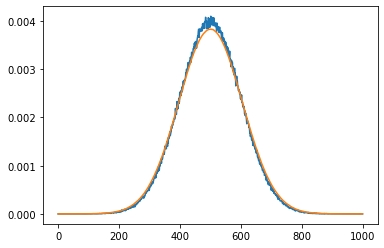

In [19]:
plt.plot(hist_norm)
plt.plot(hist_pdf_norm)

In [20]:
point_bin_indices = ( (points - hist_low) / hist_binwidth )

In [21]:
point_bin_indices

array([533.68497842, 373.12902006, 524.246338  , ..., 331.11326236,
       536.34545456, 591.85586472])

In [22]:
ia = np.array( point_bin_indices, dtype=int)

In [23]:
ia2 = np.array(   ( (points - hist_low) / hist_binwidth ),   dtype=int )

In [24]:
ia

array([533, 373, 524, ..., 331, 536, 591])

In [25]:
ia2

array([533, 373, 524, ..., 331, 536, 591])

In [26]:
for pi in range(20) :
    print(' %3d  %7.2f  %3d   (%7.2f, %7.2f)' % (pi, points[pi], ia[pi], nph[1][ia[pi]], nph[1][ia[pi]+1] ))

   0     0.67  533   (   0.66,    0.68)
   1    -2.54  373   (  -2.54,   -2.52)
   2     0.48  524   (   0.48,    0.50)
   3     1.15  557   (   1.14,    1.16)
   4     0.68  534   (   0.68,    0.70)
   5     1.16  558   (   1.16,    1.18)
   6    -0.91  454   (  -0.92,   -0.90)
   7    -0.42  479   (  -0.42,   -0.40)
   8    -2.25  387   (  -2.26,   -2.24)
   9     1.83  591   (   1.82,    1.84)
  10     1.53  576   (   1.52,    1.54)
  11     2.28  613   (   2.26,    2.28)
  12    -0.06  497   (  -0.06,   -0.04)
  13     0.21  510   (   0.20,    0.22)
  14    -0.49  475   (  -0.50,   -0.48)
  15     2.74  637   (   2.74,    2.76)
  16     3.64  681   (   3.62,    3.64)
  17     4.49  724   (   4.48,    4.50)
  18     3.60  679   (   3.58,    3.60)
  19    -0.17  491   (  -0.18,   -0.16)


In [27]:
nph[1][62]

-8.76

In [28]:
points_pdf_val = hist_pdf_norm[ ia2 ]




In [29]:
points_pdf_val

array([0.00364195, 0.00182374, 0.00373054, ..., 0.00102695, 0.00360356,
       0.00261579])